In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/
X_trn = np.loadtxt( "train_challenges.dat" )
%cd /content/drive/MyDrive/
Y_trn = np.loadtxt( "train_responses.dat" )

/content/drive/MyDrive
/content/drive/MyDrive


In [ ]:
regularization_constant = [0]*50
i=0
while (i<50):
  regularization_constant[i] = 0.1 + 0.1*i
  i=i+1

In [ ]:
p = np.linalg.lstsq(X_trn , Y_trn , rcond=None)[0]
error = [0]*len(regularization_constant)
step = 0.01

In [ ]:
import numpy as np

In [ ]:
def grad_1(Y_trn,X_trn,p):             
  i=0
  sum_array = np.zeros(len(X_trn[0]))
  while i<len(X_trn):
    a = Y_trn[i] - np.dot(p,X_trn[i])
    b = np.negative(X_trn[i])
    c = np.multiply(b,a)
    sum_array = np.add(sum_array , c)
    i=i+1
  mean=np.divide(sum_array,len(X_trn))
  return mean

def grad_2 (reg_constant, p) :
  grad = np.zeros(len(p))
  i = len (p) - 1
  while (i>=0):
    if p[i]>0:
      grad [i] = reg_constant
    else :
      grad [i] = -reg_constant
    i=i-1
  return grad

def grad_total(x,y):
  return np.add(x,y)

In [ ]:
def mymodel(X_trn,Y_trn,p,reg_constant):
  step1  = 0.1
  while(1):
     x = grad_1(Y_trn, X_trn, p)
     y = grad_2(reg_constant, p)
     grad_t = grad_total(x,y)
    
     t = np.subtract(p, np.multiply(step,grad_t))     #update the p vector

     error_1 = np.linalg.norm(np.subtract(t,p))
     if (error_1 < 25):                                #convergence criterion
        return t
     p = t
     step1 = step1


In [ ]:
def mean_abs_error(Y_trn,X_trn,t):
  i=0
  error = 0
  while i<len(Y_trn):
    y_exp = np.dot(t.T,X_trn[i]);
    error=error+np.abs((Y_trn[i]-y_exp))
    i=i+1
  return error/1600.0

In [ ]:
def hardthresholding(w): 
    w_copy = w;
    Kth_big = np.sort(w)[2048-512]
    i=0;
    while i<len(w):
      if(w_copy[i]<Kth_big):
        w_copy[i]=0;
      i=i+1;
    return w_copy;

In [ ]:
i=0
while(i<len(regularization_constant)):
  r_constant = regularization_constant[i]
  t = mymodel(X_trn,Y_trn,p,r_constant)
  t_sparse = hardthresholding(t)
  error[i] = mean_abs_error(Y_trn,X_trn,t_sparse)
  i=i+1


In [ ]:
index = np.argmin(error)
print(regularization_constant[index])
print(error[index])

0.1
150.2194119762664


In [ ]:
import matplotlib.pyplot as plt


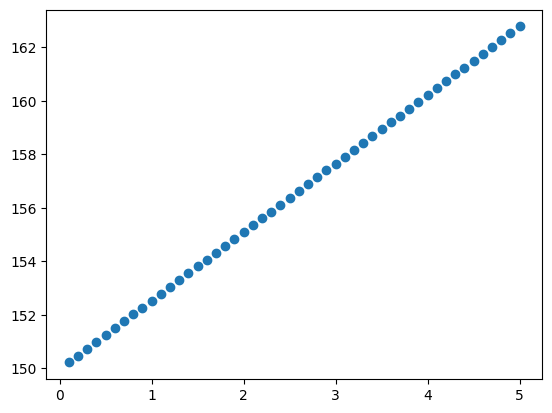

In [ ]:
# # data = error[]
# plt.hist(regularization_constant,error,bins = 50)
# plt.xlabel("lambda")
# plt.ylabel("error")
# # plt.show()
# plt.bar(regularization_constant,error,align='center') # A bar chart
# plt.xlabel('Bins')
# plt.xlim(0, 5)
# plt.ylabel('Frequency')
# plt.ylim(140,180)
plt.scatter(regularization_constant,error)
# for i in range(len(error)):
#     plt.hlines(error[i],0,regularization_constant[i]) # Here you are drawing the horizontal lines
plt.show()